Using a Heart Disease dataset from Kaggle, I have some topics I wish to explore: <br>
- PCA <br>
- Explore K-Nearest Neighbors <br>
- Logistic Regression <br>
- Cross-Validation

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.linear_model import LogisticRegression


import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dat = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
dat.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [4]:
dat.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Data Preprocessing

In [5]:
## Remove duplicates
dat.drop_duplicates(inplace=True)
dat = dat.reset_index(drop=True)

## Remove rows with missing values
dat.dropna(inplace=True)
dat = dat.reset_index(drop=True)

# Identify features
target = dat['HeartDisease']
features = dat.drop("HeartDisease", axis=1)
features_dummies = pd.get_dummies(features)

Exploratory Analysis

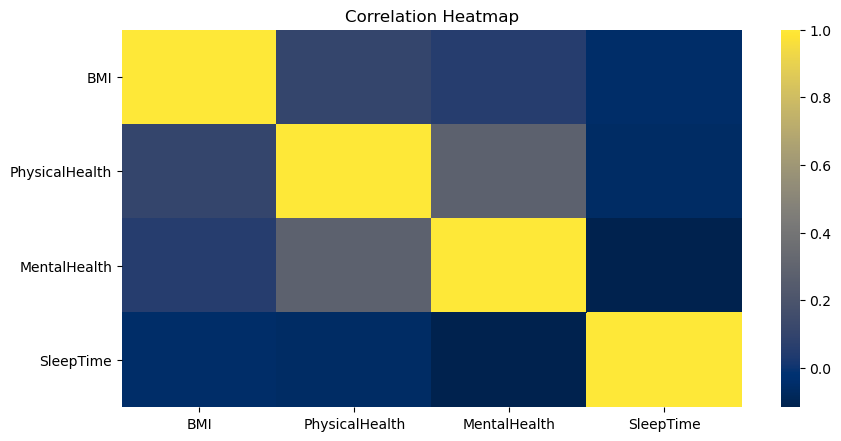

In [75]:
## Correlation Heatmap
corr = features.corr()
plt.figure(figsize=(10,5), dpi=100)
plt.title('Correlation Heatmap')
sns.heatmap(data=corr, cmap=sns.color_palette("cividis", as_cmap=True))
plt.show()

The correlation heatmap between the quantitative variables shows insignificant correlation, thus there appears to be a lack of collinearity.

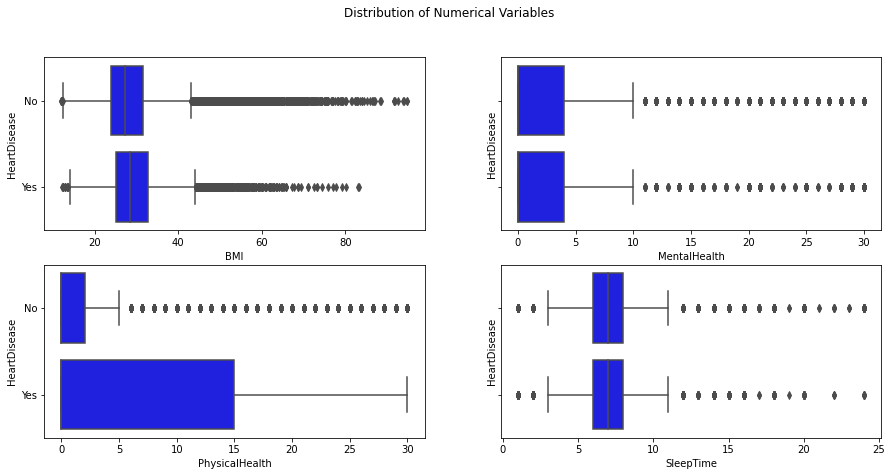

In [76]:
## Distribution of Numerical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Distribution of Numerical Variables')
sns.boxplot(ax=axes[0, 0], x=dat["BMI"], y=dat["HeartDisease"], color="blue")
sns.boxplot(ax=axes[1, 0], x=dat["PhysicalHealth"], y=dat["HeartDisease"], color="blue")
sns.boxplot(ax=axes[0, 1], x=dat["MentalHealth"], y=dat["HeartDisease"], color="blue")
sns.boxplot(ax=axes[1, 1], x=dat["SleepTime"], y=dat["HeartDisease"], color="blue")
plt.show()

In the boxplots of quantitative variables, I noticed 2 things: <br>
- The distribution of SleepTime and BMI are very similar regardless of whether or not they have heart disease. At first glance, it seems these have minimal impact on affecting the likelihood of heart disease.
- The distribution of PhysicalHealth and MentalHealth predictors shows that the data is more dispersed for people with heart disease, especially in the case of PhysicalHealth. A possible explanation is that individuals reporting many days of poor health and more likely to have heart disease however it has yet to be seen whether this observation is significant or not.

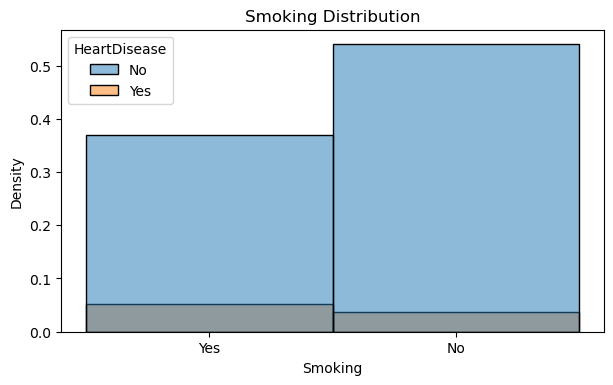

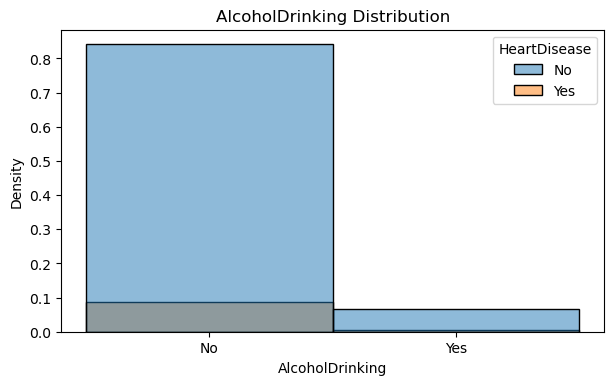

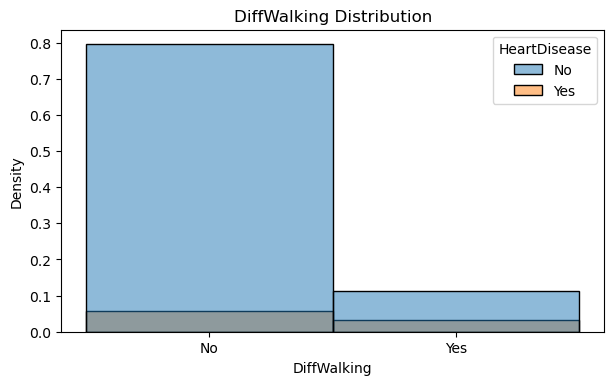

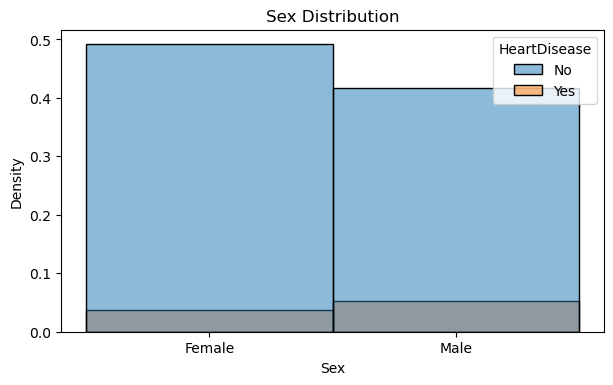

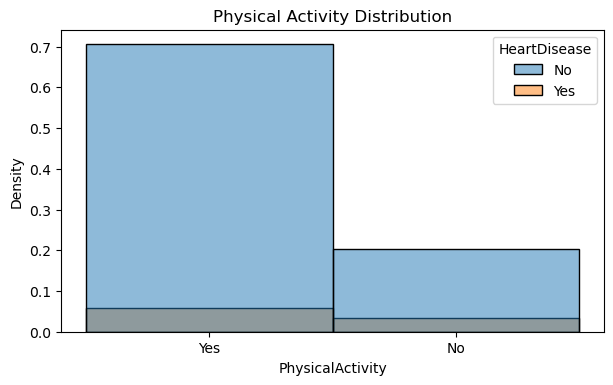

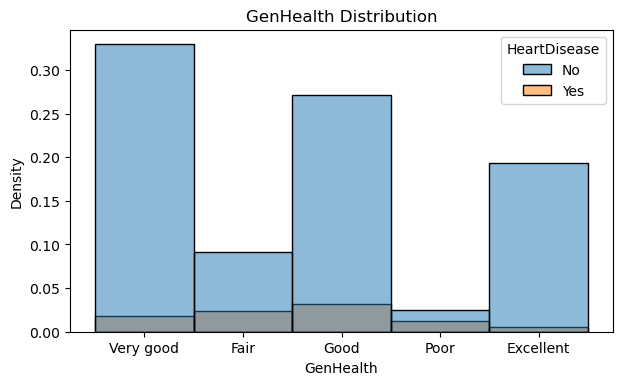

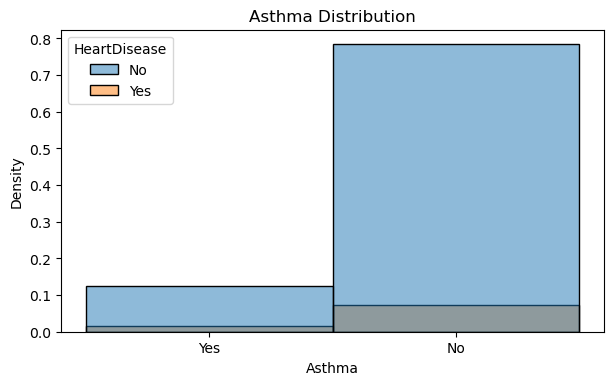

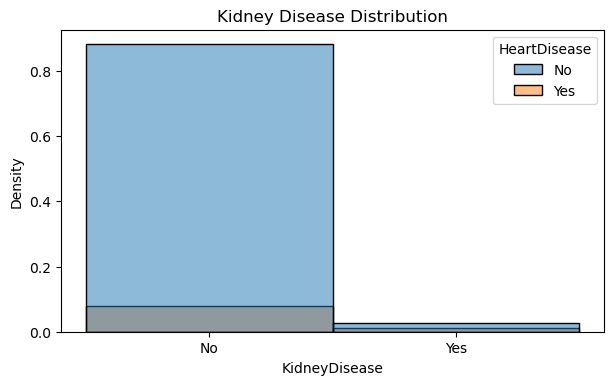

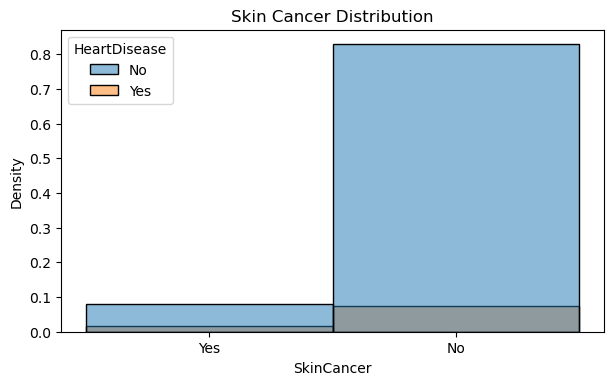

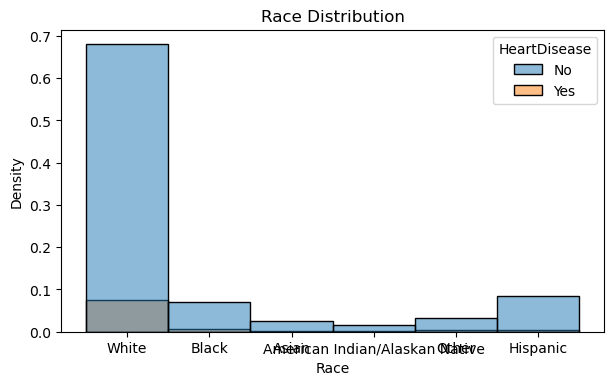

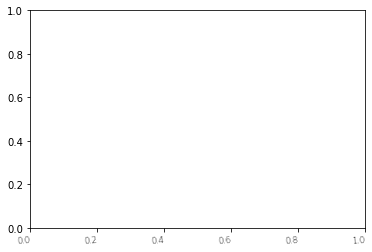

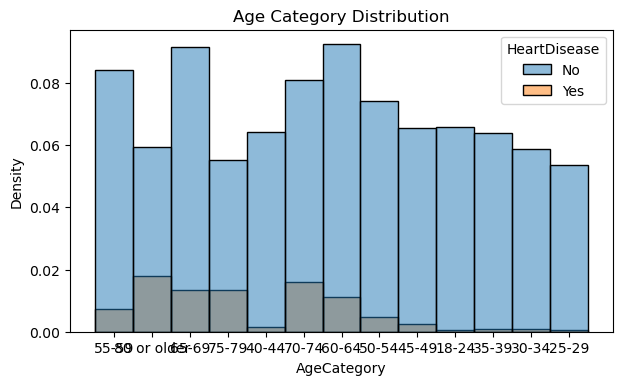

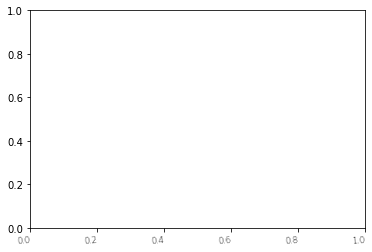

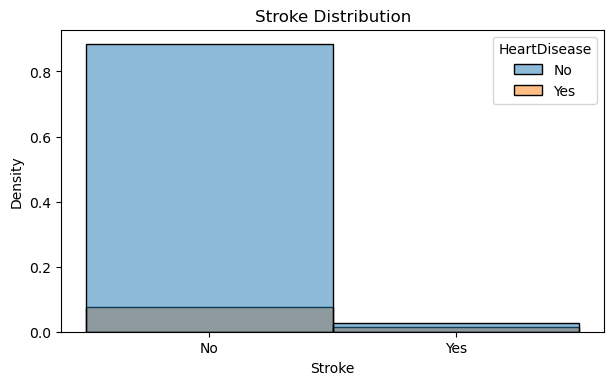

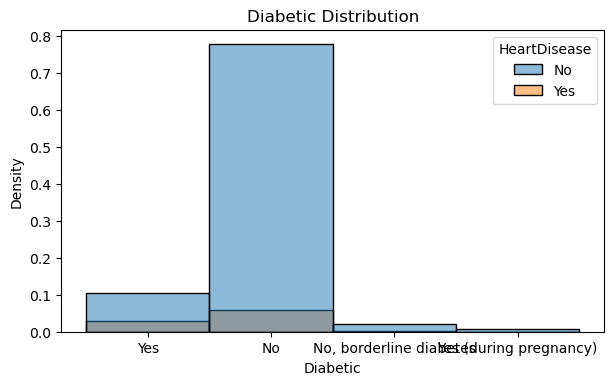

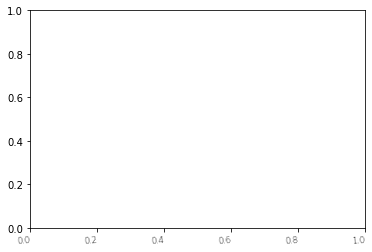

In [77]:
## Density Plots

plt.figure(figsize=(7,4), dpi=100)
plt.title("Smoking Distribution")
ax = sns.histplot(dat, x="Smoking", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("AlcoholDrinking Distribution")
ax = sns.histplot(dat, x="AlcoholDrinking", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("DiffWalking Distribution")
ax = sns.histplot(dat, x="DiffWalking", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Sex Distribution")
ax = sns.histplot(dat, x="Sex", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Physical Activity Distribution")
ax = sns.histplot(dat, x="PhysicalActivity", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("GenHealth Distribution")
ax = sns.histplot(dat, x="GenHealth", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Asthma Distribution")
ax = sns.histplot(dat, x="Asthma", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Kidney Disease Distribution")
ax = sns.histplot(dat, x="KidneyDisease", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Skin Cancer Distribution")
ax = sns.histplot(dat, x="SkinCancer", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Race Distribution")
ax = sns.histplot(dat, x="Race", hue="HeartDisease", stat="density")
plt.show()


plt.xticks(
    rotation=5,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.show()




plt.figure(figsize=(7,4), dpi=100)
plt.title("Age Category Distribution")
ax = sns.histplot(dat, x="AgeCategory", hue="HeartDisease", stat="density")
plt.show()

plt.xticks(
    rotation=5,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.show()



plt.figure(figsize=(7,4), dpi=100)
plt.title("Stroke Distribution")
ax = sns.histplot(dat, x="Stroke", hue="HeartDisease", stat="density")
plt.show()

plt.figure(figsize=(7,4), dpi=100)
plt.title("Diabetic Distribution")
ax = sns.histplot(dat, x="Diabetic", hue="HeartDisease", stat="density")
plt.show()

plt.xticks(
    rotation=5,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.show()


From the density plots of the qualitative variables, I observed three things: <br>
- There may be a correlation between AgeCategory and heart disease. Generally, old people tend to suffer from heart disease. <br>
- People with heart disease may be more likely to have suffered strokes. <br>
- There my be a correlation b

Modelling

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


# Normalize the ranges
scaler = MinMaxScaler()
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])



# Encode categorical variables
encode_list = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 
               'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

transformer = make_column_transformer((OneHotEncoder(), encode_list), remainder='passthrough')

transformed = transformer.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_test = transformer.fit_transform(X_test)
X_test = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

X_train.head(2)

,onehotencoder__x0_No,onehotencoder__x0_Yes,onehotencoder__x1_No,onehotencoder__x1_Yes,onehotencoder__x2_No,onehotencoder__x2_Yes,onehotencoder__x3_No,onehotencoder__x3_Yes,onehotencoder__x4_Female,onehotencoder__x4_Male,...,onehotencoder__x10_No,onehotencoder__x10_Yes,onehotencoder__x11_No,onehotencoder__x11_Yes,onehotencoder__x12_No,onehotencoder__x12_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.059761,0.0,0.066667,0.260870
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.327659,0.0,0.000000,0.304348


After transforming the categorical variables into indicator variables, the number of columns has increased massively to accomodate each category. <br>
To minimize problems surrounding curse of dimensionality, I try to apply principal component analysis to reduce the number of dimensions. The result is the usage of PCA with 3 components.

In [22]:
# PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca.explained_variance_ratio_.cumsum()

array([0.38063388, 0.73037829, 1.        ])

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca.explained_variance_ratio_.cumsum()

In [21]:
# K-Nearest Neighbors Algorithm

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, knn_y_pred)

## Cross Validation
k_range = range(1, 30)
k_scores = []
### Test different k-values and evaluate based on average accuracy using cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
max_ind = k_scores.index(max(k_scores))
plt.plot(k_range[max_ind], k_scores[max_ind], 'ro')
plt.show()

KeyboardInterrupt: 

In [11]:
# Best K-value
max_ind

25

In [ ]:
# Best Accuracy
k_scores[max_ind]

For the KNN algorithm, I used 5-fold cross validation and k=1 to k=30 to find the accuracy of the predicted results. <br>
I plotted the k-values and accuracy to depict the effects of increasing the k-value. The accuracy starts to settle after around k=5, marginally increases until around k=10, then begins to plateau. <br>

Logistic Regression

In [13]:
lgr = LogisticRegression(random_state=1).fit(X_train, y_train) 
lgr_y_pred = lgr.predict(X_test) 
metrics.accuracy_score(y_test, lgr_y_pred)


0.9097673339520085

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
X_train = X_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True)

le1 = LabelEncoder()
le2 = LabelEncoder()
encode_list = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex','AgeCategory', 'Race', 
               'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'] 
for col in encode_list:
    X_train[col] = le1.fit_transform(X_train[col])
    X_test[col] = le1.fit_transform(X_test[col])
y_train = le2.fit_transform(y_train)
y_test = le2.fit_transform(y_test)


In [35]:
lgr = LogisticRegression(random_state=1, penalty='l1', solver='liblinear').fit(X_train, y_train)
scores_l1 = cross_val_score(lgr, X_train, y_train, cv=5, scoring='accuracy').mean()
scores_l1

0.9103462264978998

In [33]:
pd.DataFrame(np.transpose(lgr.coef_), X_train.columns, columns=['Coefficients'])

,Coefficients
BMI,0.013638
Smoking,0.425838
AlcoholDrinking,-0.307053
Stroke,1.142662
PhysicalHealth,0.020802
MentalHealth,0.009679
DiffWalking,0.410242
Sex,0.737203
AgeCategory,0.279662
Race,0.051639
